<a href="https://colab.research.google.com/github/monica-g0/evidencia-2---mineria/blob/main/E2_Miner%C3%ADa_%7C_A01735626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introducción
Determinar el precio de una casa puede convertirse en una tarea compleja, ya que implica tener un conocimiento profundo de los valores de mercado, los costos asociados a la propiedad y considerar diversos factores como el tamaño de la casa, la ubicación, las amenidades disponibles, entre otros. A pesar de la complejidad, esta tarea es esencial, ya que establecer un precio demasiado alto puede alejar a posibles compradores, prolongando innecesariamente la permanencia de la propiedad en el mercado. Por otro lado, fijar un precio adecuado es crucial para atraer compradores potenciales y asegurar una venta exitosa (BBVA, s.f.).

En este reporte, se emplean VARIABLES CRÍTICAS PARA PRONOSTICAR EL VALOR DE INMUEBLES EN CDMX. Se utilizan diversas técnicas estadísticas, como regresión lineal, árboles de decisión y redes neuronales, para determinar los precios por metro cuadrado de diversas propiedades en la Ciudad de México. Estas herramientas analíticas permiten una evaluación más precisa y fundamentada, proporcionando a Erich Zann y Asociados una ventaja estratégica en el competitivo mercado inmobiliario de la CDMX.

Para ello, vamos a conocer la base de datos con la que entrenaremos los modelos, que pueden ver en la siguiente imagen.

In [3]:
#Carga de archivos
inmu = pd.read_csv("Clusters.csv")
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           657 non-null    int64  
 1   Alcaldia             657 non-null    object 
 2   Colonia              657 non-null    object 
 3   X1                   657 non-null    float64
 4   X2                   657 non-null    float64
 5   X3                   657 non-null    float64
 6   X4                   657 non-null    float64
 7   X5                   657 non-null    float64
 8   X6                   657 non-null    float64
 9   X7                   657 non-null    float64
 10  X8                   657 non-null    float64
 11  X9                   657 non-null    float64
 12  X10                  657 non-null    float64
 13  Cocina_equip         657 non-null    int64  
 14  Gimnasio             657 non-null    int64  
 15  Amueblado            657 non-null    int

Esta cuenta con las siguientes variables:

1.   **Alcaldía:** Indica la demarcación administrativa dentro de la Ciudad de México donde se encuentra ubicado el inmueble.
2.   **Colonia:** Hace referencia al nombre de la zona o vecindario específico donde se localiza la propiedad.
3.   **Cocina Equipada:** Indica si la vivienda cuenta con una cocina equipada con electrodomésticos y utensilios básicos.
4.   **Gimnasio:** Refiere a la presencia o ausencia de instalaciones deportivas o gimnasio en el inmueble.
5. **Amueblado:** Indica si la propiedad se ofrece en venta con muebles incluidos.
6. **Alberca:** Se refiere a la presencia o ausencia de una piscina en el lugar.
7. **Elevador:** Señala si el edificio o complejo inmobiliario dispone de ascensores para acceder a los diferentes niveles.
8. **m2 Construido:**Representa los metros cuadrados de construcción total de la propiedad.
9. **Baños:** Número de baños presentes en la vivienda.
10. **Recámaras:** Indica la cantidad de habitaciones destinadas para dormir en la propiedad.
11. **Lugares de Estacionamiento:** Número de espacios designados para estacionar vehículos.
12. **Precio por m2:** Costo por metro cuadrado de la propiedad, un indicador clave para la valoración inmobiliaria y nuestra variable objetivo en los modelos.
13. **Cluster Labels:** Etiquetas asignadas a los conglomerados obtenidos mediante técnicas de análisis de conglomerados.
14. **Conglomerados:** Agrupaciones resultantes del análisis de conglomerados que clasifican las propiedades según características similares.
15. **Nivel Socioeconómico:** Clasificación del nivel socioeconómico de la zona donde se encuentra la propiedad, derivada del análisis de diversas variables socioeconómicas.
16. **X1:** Población de 15 años o mas analfabeta
17. **X2:** Población de 6 a 14 años que no asiste a la escuela
18. **X3:** Población de 15 a 24 años que no asiste a la escuela
19. **X4:** Población de 15 años o más con educación básica incompleta
20. **X5:** Población sin derechohabiencia a servicios de salud
21. **X6:** Viviendas con hacinamiento
22. **X7:** Viviendas que no disponen de agua entubada de la red pública
23. **X8:** Viviendas que no disponen de energía eléctrica
24. **X9:** Viviendas que no disponen de celular
25. **X10:** Viviendas que no disponen de computadora o laptop o tablet

Asimismo y como método introductorio, a continuación realizaremos un análisis descriptivo de las variables más importantes.


In [267]:
preciom2_mean = inmu['Precio_m2'].mean()
m2_max = inmu['m2_construido'].max()
m2_min = inmu['m2_construido'].min()
top_alcaldias = inmu.groupby('Alcaldia')['Precio_m2'].mean().nlargest(5)

print(f"Promedio de Precio_m2: {preciom2_mean}")
print(f"Mayor m2 construidos: {m2_max}")
print(f"Menor m2 construidos: {m2_min}")
print("Top 5 de alcaldías con precios más altos:")
print(top_alcaldias)

Promedio de Precio_m2: 4094.6772070015218
Mayor m2 construidos: 500.0
Menor m2 construidos: 34.0
Top 5 de alcaldías con precios más altos:
Alcaldia
Miguel Hidalgo            15338.112184
Cuajimalpa                13259.309043
Alvaro Obregon             7821.176667
La Magdalena Contreras     7013.128421
Cuahtemoc                  5208.485963
Name: Precio_m2, dtype: float64


Como se puede observar en el análisis realizado previamente, el promedio de precios que maneja esta agencia inmobiliara es de $4,094.67 pesos mexicanos, siendo las alcaldías que manejan los precios más altos Miguel Hidalgo, Cuajimalpa, Álvaro Obregón, La Magdalena Contreras, y Cuahtemoc.

Asimismo, el inmueble más pequeño es de 34 m2 construidos, y el más grande siendo de 500m2. Esto nos da una idea general hacia más o menos cómo varían los precios de acuerdo a su localización y tamaño.

Dicho esto, procedemos con los modelos matemáticos para la predicción de nuevos inmuebles:

# Generación de Modelos

## Regresión Múltiple

La regresión lineal múltiple es una técnica estadística que extiende el concepto de regresión lineal simple al considerar múltiples variables independientes para predecir una variable dependiente. En nuestro análisis, aplicaremos la regresión lineal múltiple como una herramienta poderosa para modelar y predecir el precio por metro cuadrado de las propiedades inmobiliarias en la Ciudad de México. Al incorporar diversas características, como tamaño de construcción, número de habitaciones, servicios y ubicación, este enfoque nos permitirá capturar de manera más precisa la complejidad de los factores que influyen en la valoración de los inmuebles.

In [269]:
#Comenzamos con instalar las Librerías necesarias
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Modelo 1 (Todas las variables)

Nuestro primer modelo incluye todas las variables para determinar qué tan efectivo es el modelo y las variables que deberían ser eliminadas para obtener mejores resultados.

In [270]:
model = LinearRegression()
type(model)

x = inmu[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.7480588775333464
Correlación:  0.8649039701223173
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     99.55
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          3.17e-176
Time:                        22:10:15   Log-Likelihood:                -6075.7
No. Observations:                 657   AIC:                         1.219e+04
Df Residuals:                     637   BIC:                         1.228e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Observamos que el 74% de nuestra variable objetivo es explicada por el modelo, que tienen un AIC y BIC bajos (lo cual es bueno pero debemos comparar con modelos posteriores) y que, de acuerdo al valor p, (Prob F-statistics) es significativo debido a que es menor a 0.05. Sin embargo, observamos que algunas variables como X2, X4, X6 o X7 no son tan significativas (no impactan tanto en el modelo) por su valor p mayor a 0.05, por lo que serán eliminadas para el siguiente modelo.

### Modelo 2 (Con significantes)

Para este segundo modelo, solo consideraremos las variables de X2, X3, X5, X8, X10, Alberca, Baños, Recamaras y Lugares de estacionamiento debido a que estas fueron significativas en el modelo anterior.

In [272]:
#Modelo 2 (Con significantes)
model = LinearRegression()
type(model)

x = inmu[["X2", "X3", "X5","X8", "X10", "Alberca", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.7367105913396991
Correlación:  0.8583184673183369
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     201.2
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          5.98e-181
Time:                        22:11:45   Log-Likelihood:                -6090.2
No. Observations:                 657   AIC:                         1.220e+04
Df Residuals:                     647   BIC:                         1.225e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

En este modelo observamos un valor p significativo, por lo que el modelo es funcional. Además, el modelo explica el 73% del precio por metros cuadrados. En cuanto al BIC y AIC, vemos valores muy similares que en el modelo anterior. Finalmente, encontramos algunas variables otra vez no significativas. Sin embargo, debido a que el modelo bajó su efectividad en vez de aumentarla, procederemos a utilizar otras estrategias para definir el mejor modelo.

### Modelo 3 (Con correlaciones más altas)

Este nuevo modelo considerará aquellas variables mejor correlacionadas con las variabele dependiente, por lo que primero generaremos un mapa de calor para encontrar aquellas mejor relacionadas, como puede observarse en el siguiente gráfico.

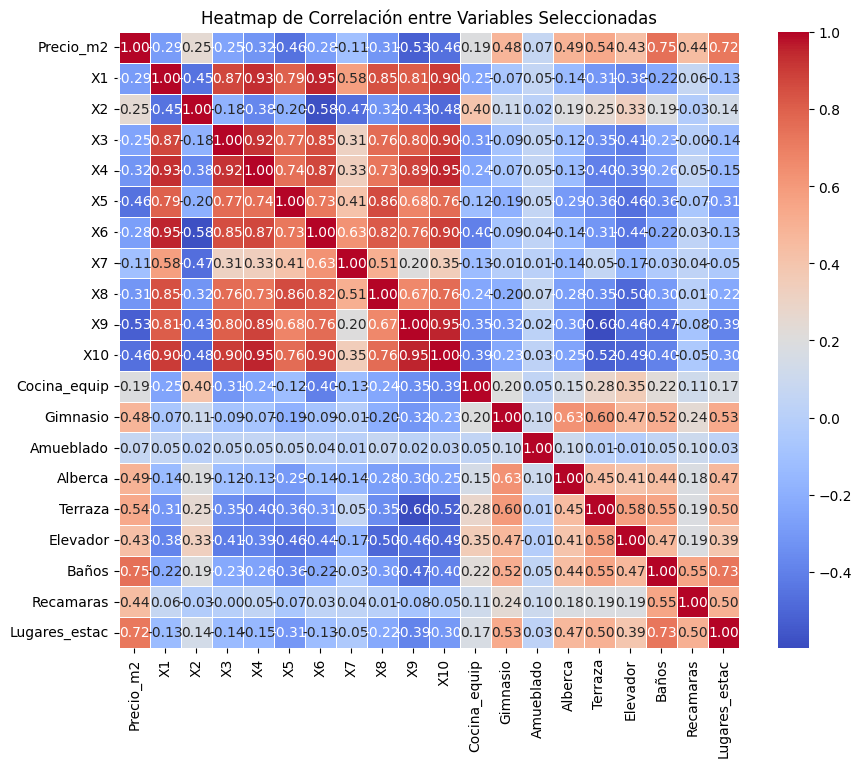

In [273]:
#Modelo 3 (Con correlaciones más altas)
data_selected = inmu[["Precio_m2", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]

# Calcula la matriz de correlación
correlation_matrix = data_selected.corr()

# Crea el heatmap con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Heatmap de Correlación entre Variables Seleccionadas")
plt.show()

Vemos que las variables Gimnasio, Alberca, Terraza, Elevador, Baños, Recámaras y Lugares de Estacionamiento tienen las relaciones más fuertes, por lo que serán usadas en el siguiente modelo:

In [274]:
model = LinearRegression()
type(model)

x = inmu[["Gimnasio", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.6483537987961023
Correlación:  0.8052041969563387
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     170.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          1.01e-142
Time:                        22:12:56   Log-Likelihood:                -6185.2
No. Observations:                 657   AIC:                         1.239e+04
Df Residuals:                     649   BIC:                         1.242e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

En este observamos una r^2 (eficacia del modelo), del 64%, es servible el modelo e igualmente un AIC y BIC similar a los anteriores. Nuevamente vemos algunas variables no significativas como Elevador y Recámaras, las cuales serán eliminadas para generar un nuevo modelo.

### Modelo 4 (Con significantes de la anterior)

Este último modelo considera las variables significantes del modelo anterior, con el cual obtenemos los siguientes resultados.

In [275]:
#Modelo 4 (Con significantes de la anterior)
model = LinearRegression()
type(model)

x = inmu[["Gimnasio", "Alberca", "Terraza", "Baños", "Lugares_estac"]]
y = inmu["Precio_m2"]

model.fit(X = x, y = y)
model.__dict__
#Coeficiente de determinación
determinacion = model.score(x, y)
correlacion = np.sqrt(determinacion)
print("Determinacion:", determinacion)
print("Correlación: ", correlacion)

# Agrega una constante al conjunto de datos (intercepto)
x_with_intercept = sm.add_constant(x)

# Ajusta el modelo
model = sm.OLS(y, x_with_intercept).fit()

# Imprime un resumen del modelo que incluye valores p
print(model.summary())

Determinacion: 0.6477140502689187
Correlación:  0.8048068403467498
                            OLS Regression Results                            
Dep. Variable:              Precio_m2   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     239.4
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          7.59e-145
Time:                        22:13:34   Log-Likelihood:                -6185.8
No. Observations:                 657   AIC:                         1.238e+04
Df Residuals:                     651   BIC:                         1.241e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Conclusión**

El modelo es servible, explica nuevamente el 64% del precio por metro cuadrado de las casas y el BIC y AIC es parecido a los demás.


## Redes Neuronales ANN

A continuación se hará también un análisis utilizando un modelo de redes artificiales neuronales. En términos simples, una red neuronal está compuesta por capas de nodos o neuronas interconectadas que nos ayudará a determinar una predicción con bases de datos no lineales y grandes. Debido a que esta es una base de datos poco pequeña, no esperamos gran complejidad al momento de la realización de los modelos.

### Modelo 1

El primer modelo se realizó utilizando todas las variables a excepción de nuestra variable objetivo *Precio_m2*.

A pesar de que hay algunas predicciones que sí se asemejan a los valores reales, muchos otros varían demasiado, y esto se puede comprobar con los datos estadísticos como lo son el error cuadrático medio, el error absoluto medio, y el coeficiente de determinación (R-squared).

El error cuadrático resultó muy alto al igual que el error absoluto, por lo que este modelo no es del todo confiable.

In [276]:
X = inmu[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=19))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

Epoch 1/100
15/15 [==============================] - 2s 29ms/step - loss: 44935460.0000 - val_loss: 37583028.0000
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 44913540.0000 - val_loss: 37567612.0000
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 44883604.0000 - val_loss: 37544852.0000
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 44836612.0000 - val_loss: 37507968.0000
Epoch 5/100
15/15 [==============================] - 0s 14ms/step - loss: 44759736.0000 - val_loss: 37451052.0000
Epoch 6/100
15/15 [==============================] - 0s 11ms/step - loss: 44643640.0000 - val_loss: 37362644.0000
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 44462644.0000 - val_loss: 37237440.0000
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 44218920.0000 - val_loss: 37056256.0000
Epoch 9/100
15/15 [==============================] - 0s 10ms/step - loss: 43854448.0000 - 

### Modelo 2

El siguiente modelo utilizó menos variables, las cuales se cree que tienen una mayor relación con el precio por metro cuadrado.

Hay un poco más de predicciones un poco más acertadas. Sin embargo, el error cuadrático medio (MSE) resultó aún más alto. El coeficiente de determinación y el MAE resultaron muy similares al modelo anterior, por lo que también se descarta para la utilización del análisis.

In [277]:
X = inmu[["X2", "X3", "X5","X8", "X10", "Alberca", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=9))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')


Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 44935956.0000 - val_loss: 37585816.0000
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 44921824.0000 - val_loss: 37575032.0000
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 44902564.0000 - val_loss: 37560304.0000
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 44875764.0000 - val_loss: 37538180.0000
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 44837552.0000 - val_loss: 37504296.0000
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 44775208.0000 - val_loss: 37457172.0000
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 44691660.0000 - val_loss: 37386168.0000
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 44563256.0000 - val_loss: 37291192.0000
Epoch 9/100
15/15 [==============================] - 0s 7ms/step - loss: 44399044.0000 - val_lo

### Modelo 3

En este tercer modelo descartamos todas las variables numéricas y nos enfocamos nada más en las categóricas, siendo si los inmuebles tenían gimnasio, alberca, terraza, elevador, baños, recámaras, o lugares para estacionar.

Luego de realizar todo el proceso de regresión para redes neuronales, los resultados fueron un poco más favorables, con un MSE y MAE más bajos, y un R^2 más alto, por lo que este modelo es un poco más acertado y confiable.

In [278]:
X = inmu[["Gimnasio", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=7))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

Epoch 1/100
15/15 [==============================] - 4s 53ms/step - loss: 44933420.0000 - val_loss: 37584356.0000
Epoch 2/100
15/15 [==============================] - 0s 17ms/step - loss: 44922912.0000 - val_loss: 37574380.0000
Epoch 3/100
15/15 [==============================] - 0s 19ms/step - loss: 44908972.0000 - val_loss: 37561280.0000
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 44889608.0000 - val_loss: 37541404.0000
Epoch 5/100
15/15 [==============================] - 0s 16ms/step - loss: 44859704.0000 - val_loss: 37511280.0000
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 44815820.0000 - val_loss: 37466756.0000
Epoch 7/100
15/15 [==============================] - 0s 13ms/step - loss: 44746412.0000 - val_loss: 37403768.0000
Epoch 8/100
15/15 [==============================] - 0s 21ms/step - loss: 44656712.0000 - val_loss: 37311024.0000
Epoch 9/100
15/15 [==============================] - 0s 15ms/step - loss: 44520212.0000 

### Modelo 4

El siguiente modelo de redes neuronales utilizó parte de las mismas variables categóricas, pero descartando algunas. Los resultados fueron similares al modelo anterior, aunque un poco más altos, por lo que el Modelo 3 ha sido el de mejor desempeño hasta el momento.

In [279]:
X = inmu[["Gimnasio", "Alberca", "Terraza", "Baños", "Lugares_estac"]]
y = inmu["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=5))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 44935304.0000 - val_loss: 37585536.0000
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 44923096.0000 - val_loss: 37573768.0000
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 44907324.0000 - val_loss: 37558636.0000
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 44886736.0000 - val_loss: 37537108.0000
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 44856072.0000 - val_loss: 37506300.0000
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 44813208.0000 - val_loss: 37461128.0000
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 44751856.0000 - val_loss: 37400332.0000
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 44668364.0000 - val_loss: 37318484.0000
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 44555860.0000 - val_lo

### Modelo 5 (mejor)

El quinto y último modelo resultó ser el más favorable. Con un MSE de 3,517,933.25, un MAE de 1,228.57 y un R^2 de 0.79. A comparación con el resto de los modelos, este es el más favorable/confiable, puesto que tiene el error más bajo y el coeficiente de determinación más alto, por lo que el 79% de los datos puede ser explicado por este modelo y no representará tantos errores en su predicción. Sin embargo, aún tiene un nivel de error un tanto alto.

Esto lo podemos observar a través de un análisis descriptivo de las predicciones:

* Media de las Predicciones: 4159.63
* Mediana de las Predicciones: 2292.18
* Desviación Estándar de las Predicciones: 4340.75
* Mínimo de las Predicciones: 152.08
* Máximo de las Predicciones: 23638.89


* Media de datos reales: 4094.68
* Mediana de datos reales: 1918.08
* Desviación Estándar de datos reales: 5003.91
* Mínimo de datos reales: 1.25
* Máximo de datos reales: 47200.00

Como se puede observar, tanto la media como la mediana tienen datos similares o sin tanta diferencia entre sí. Sin embargo, datos comom la desviación estándar, el mínimo y el máximo son muy diferentes, por lo que podemos corroborar el impacto que el error tiene en ellos.

Epoch 1/100
15/15 [==============================] - 4s 49ms/step - loss: 44936752.0000 - val_loss: 37585304.0000
Epoch 2/100
15/15 [==============================] - 0s 21ms/step - loss: 44922608.0000 - val_loss: 37572544.0000
Epoch 3/100
15/15 [==============================] - 0s 20ms/step - loss: 44905416.0000 - val_loss: 37556644.0000
Epoch 4/100
15/15 [==============================] - 0s 21ms/step - loss: 44882308.0000 - val_loss: 37534360.0000
Epoch 5/100
15/15 [==============================] - 0s 13ms/step - loss: 44849884.0000 - val_loss: 37502824.0000
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 44803136.0000 - val_loss: 37459480.0000
Epoch 7/100
15/15 [==============================] - 0s 12ms/step - loss: 44739988.0000 - val_loss: 37401224.0000
Epoch 8/100
15/15 [==============================] - 0s 9ms/step - loss: 44656064.0000 - val_loss: 37323560.0000
Epoch 9/100
15/15 [==============================] - 0s 9ms/step - loss: 44546540.0000 - v

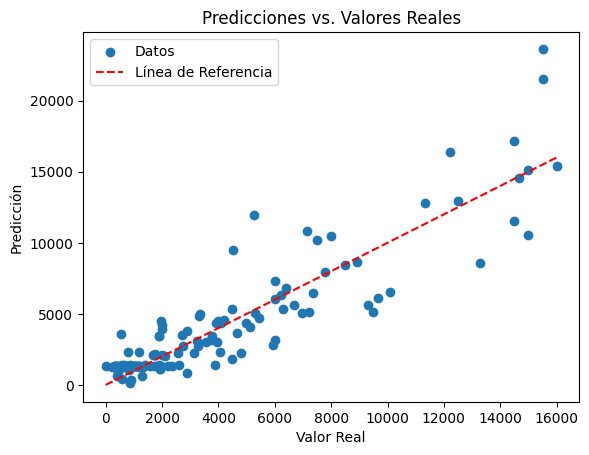

Error Cuadrático Medio (MSE): 3517933.25
Error Absoluto Medio (MAE): 1228.57
Coeficiente de Determinación (R^2): 0.79
 
Media de las Predicciones: 4159.63
Mediana de las Predicciones: 2292.18
Desviación Estándar de las Predicciones: 4340.75
Mínimo de las Predicciones: 152.08
Máximo de las Predicciones: 23638.89
 
Media de datos reales: 4094.68
Mediana de datos reales: 1918.08
Desviación Estándar de datos reales: 5003.91
Mínimo de datos reales: 1.25
Máximo de datos reales: 47200.00


In [280]:
df = inmu

X = df[["m2_construido","Baños","Recamaras","Lugares_estac"]]
y = df["Precio_m2"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=413422)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal para regresión
model = Sequential()
model.add(Dense(units=35, activation='relu', input_dim=4))
model.add(Dense(units=35))

model.add(Dense(units=1, activation='linear'))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para regresión
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test_scaled, y_test)
print(f'Error Cuadrático Medio en el conjunto de prueba: {loss:.2f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

# Visualizar algunas predicciones
for i in range(10):
    print(f'Predicción: {predictions[i][0]:.2f}, Valor Real: {y_test.iloc[i]:.2f}')

# Visualizar los resultados de la predicción con la línea de referencia
plt.scatter(y_test, predictions, label='Datos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Línea de Referencia')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()

# Calcular métricas
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Mostrar las métricas
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Error Absoluto Medio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

# Calcular estadísticas descriptivas de las predicciones
mean_prediction = np.mean(predictions)
median_prediction = np.median(predictions)
std_dev_prediction = np.std(predictions)
min_prediction = np.min(predictions)
max_prediction = np.max(predictions)

mean_real = np.mean(y)
median_real = np.median(y)
std_dev_real = np.std(y)
min_real= np.min(y)
max_real = np.max(y)

# Mostrar las estadísticas
print(" ")
print(f'Media de las Predicciones: {mean_prediction:.2f}')
print(f'Mediana de las Predicciones: {median_prediction:.2f}')
print(f'Desviación Estándar de las Predicciones: {std_dev_prediction:.2f}')
print(f'Mínimo de las Predicciones: {min_prediction:.2f}')
print(f'Máximo de las Predicciones: {max_prediction:.2f}')

print(" ")
print(f'Media de datos reales: {mean_real:.2f}')
print(f'Mediana de datos reales: {median_real:.2f}')
print(f'Desviación Estándar de datos reales: {std_dev_real:.2f}')
print(f'Mínimo de datos reales: {min_real:.2f}')
print(f'Máximo de datos reales: {max_real:.2f}')


## Árboles de Decisión

Por último, realizaremos un análisis de regresión utilizando los árboles de decisión. Los árboles de decisión son modelos de aprendizaje automático que se utilizan para tomar decisiones basadas en condiciones lógicas. Estos modelos son una representación gráfica en forma de árbol en el que cada nodo interno representa una prueba en un atributo, cada rama representa el resultado de la prueba, y cada hoja representa una decisión o un resultado.

Utilizaremos este modelo para determinar el precio de una casa con base en sus características, como lo hicimos en modelos anteriores.

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
inmu.dropna(inplace=True)

### Modelo 1

En primera instancia, tomamos todas las columnas de tipo numérico a excepción de nuestra variable de precio, y las entrenamos como corresponde para el análisis en cuestión.

In [5]:
#Tomamos todas las columnas NUMÉRICAS a excepción de la 23 (nuestro target variable) para
#determinar el comportamiento de las variables con respecto a nuestra variable
X = inmu.select_dtypes(include=['float64', 'int64']).drop(columns=['Precio_m2','Cluster Labels','Unnamed: 0'])
#x = inmu.iloc[:,1:]   # todas las columnas posteriores a la primera
y = inmu.iloc[:,23]    # la primera columna

#Entrenamos nuestro modelo con las variables seleccionadas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3)

#regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
#regr_2.fit(X, y)

In [6]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Cocina_equip,Gimnasio,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac
0,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,1,0,0,1,1,150.0,2.0,3,2
1,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,1,0,0,0,0,0,51.0,1.0,2,1
2,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,6.675828,39.647755,1,1,0,0,1,1,305.0,3.0,3,3
3,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,0,0,0,0,0,0,42.0,1.0,2,1
4,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,9.610347,52.749945,0,0,0,0,0,0,50.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0.351538,6.230002,31.695907,6.071809,20.071382,0.476854,0.025017,0.019992,3.169090,15.149627,1,1,0,0,1,1,99.0,2.0,2,1
653,0.771834,4.983509,32.914771,10.974065,24.551109,1.695343,0.048384,0.030823,5.469807,25.714023,1,0,0,0,0,1,64.0,1.0,2,1
654,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,1,0,0,1,1,90.0,1.0,3,1
655,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,9.555907,50.081349,1,0,0,0,0,0,50.0,1.0,2,1


Corremos nuestro modelo y determinamos algunas predicciones.

In [7]:
#Corremos nuestro modelo:

dtree = DecisionTreeRegressor(random_state=44)
dtree.fit(x_train, y_train)  #entrenamiento: covars y respuesta
pred = dtree.predict(x_test)  #predicción con covars no entrenadas.
print(pred)

[6.99300000e+02 8.60657000e+02 4.99582500e+03 1.91808000e+03
 1.05947000e+03 6.95000000e+02 3.46500000e+03 1.05947000e+03
 9.90000000e+02 7.60000000e+02 4.99000000e+03 3.49000000e+04
 1.14500000e+03 6.50000000e+03 1.25000000e+00 1.02000000e+04
 1.84000000e+03 5.28237600e+03 7.42500000e+02 8.90000000e+02
 1.41000000e+03 1.84500000e+03 2.65000000e+03 8.50000000e+03
 1.50000000e+03 7.20000000e+02 2.70000000e+03 6.23740000e+02
 4.50000000e+03 4.84776333e+02 7.56122300e+03 8.28000000e+03
 2.50000000e+03 1.40000000e+04 7.91528000e+02 1.10000000e+03
 8.16000000e+02 9.26666667e+02 3.38100000e+03 8.25200000e+02
 1.29000000e+03 1.50000000e+04 1.55000000e+04 9.88368000e+02
 6.70000000e+03 3.27683000e+03 7.40000000e+03 6.23100000e+03
 1.84500000e+03 1.38000000e+03 3.46500000e+03 1.41000000e+03
 7.99130000e+02 5.01109000e+02 1.25000000e+04 7.50000000e+02
 5.82256700e+03 7.37418000e+02 7.42500000e+02 3.30000000e+02
 4.99000000e+03 2.62400000e+03 7.41000000e+02 8.99000000e+02
 1.38000000e+03 6.993000

Evaluamos nuestro modelo utilizando tres estadísticos principales: el MSE (error cuadrático medio), el RMSE (la raíz del error cuadrático medio, para una mejor lectura), así como el coeficiente de determinación o el R-squared.

In [8]:
from sklearn.metrics import mean_squared_error
#Evaluamos nuestro modelo
print("Mean Squared Error:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R-squared:", r2_score(y_test, pred))

Mean Squared Error: 6369884.053984367
RMSE: 2523.86292297826
R-squared: 0.670444585710922


 Hay un margen de error increíblemente alto, dado que con tan solo 650 datos existe un error cuadrático de 6,369,884.05. Sin embargo, nuestro valor de R-squared quedó relativamente bien (el 67% de nuestros datos puede ser explicado por nuestro modelo).  

 Debido a que utilizamos todas las variables dentro de la base de datos, es entendible que el margen de error sea tan grande. Sin embargo, parece que el R-squared es significativo, por lo que continuaremos con realizar un análisis para determinar la importancia de cada una de las variables elegidas y así su relevancia hacia nuestro modelo, para intentar corregir este error.

In [9]:
feature_importance = dtree.feature_importances_
feature_names = X.columns

# Para una mejor visualización, crearemos un data frame nuevo con los nombres de las variables
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Lo ordenamos en orden descendiente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostramos los resultados
print(feature_importance_df)

          Feature  Importance
16  m2_construido    0.686794
17          Baños    0.143470
8              X9    0.069785
4              X5    0.041400
1              X2    0.015840
18      Recamaras    0.010081
19  Lugares_estac    0.007758
12      Amueblado    0.006102
13        Alberca    0.005171
6              X7    0.004055
2              X3    0.002808
11       Gimnasio    0.002368
7              X8    0.001188
3              X4    0.001163
9             X10    0.000723
14        Terraza    0.000476
15       Elevador    0.000288
0              X1    0.000273
5              X6    0.000146
10   Cocina_equip    0.000109


Podemos observar que las variables con mayor relevancia a nuestro análisis son los m2 construidos, así como la cantidad de baños que tiene el inmueble y las viviendas que no disponen de celular (X9). Sin embargo, estas últimas dos no parecen tener la relevancia tan directa como la que tiene los metros cuadrados construidos con nuestra variable de precio. Las tomaremos de igual manera para la realización de este análisis.

In [10]:
#Tomamos las columnas con mayor importancia en relación a nuestra target variable
#variables_seleccionadas = ['m2_construido', 'X9', 'X5']
variables_seleccionadas = ['m2_construido','Baños','X9']
X2 = inmu[variables_seleccionadas]
y = inmu.iloc[:,23]    # nuestra variable dependiente

#Entrenamos nuestro modelo con las variables seleccionadas
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.3)

#regr_1 = DecisionTreeRegressor(max_depth=2)
#regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X, y)
#regr_2.fit(X, y)

In [11]:
#Corroboramos que nuestras variables estén guardadas exitosamente
X2

,m2_construido,Baños,X9
0,150.0,2.0,9.555907
1,51.0,1.0,9.610347
2,305.0,3.0,6.675828
3,42.0,1.0,9.610347
4,50.0,1.0,9.610347
...,...,...,...
652,99.0,2.0,3.169090
653,64.0,1.0,5.469807
654,90.0,1.0,9.555907
655,50.0,1.0,9.555907


In [12]:
#Corremos nuestro modelo:
dtree2 = DecisionTreeRegressor(random_state=44)
dtree2.fit(x2_train, y2_train)  #entrenamiento: covars y respuesta
pred2 = dtree2.predict(x2_test)  #predicción con covars no entrenadas.
print(pred2)

[ 6950.          1052.68333333 10290.          1222.67875
   926.66666667   935.46        3010.          1600.
  9150.           514.63333333  3148.          5300.
  2950.          5200.          3148.           784.5
  3465.          7019.587       6950.         15000.
  4258.60833333  8524.           378.06         800.
   613.2995      1052.68333333  6750.          6750.
 11312.978       3840.           860.657       9150.
  1915.           990.           821.632        496.3
  1600.          3850.         10175.455        754.
  9150.          5800.          6224.          1900.
  3276.83         840.7005       613.97790909   723.84
   613.33333333  1390.          2178.           723.84
   950.         12800.          1222.67875     8900.
  1840.           523.           771.           850.
   660.         14000.         17500.         14666.293
  5000.          3465.           780.         15000.
  2950.          1250.          1236.66666667 14666.293
  5467.14         801.02975  

In [13]:
from sklearn.metrics import mean_squared_error
#Evaluamos nuestro modelo
print("Mean Squared Error:", mean_squared_error(y2_test, pred2))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, pred2)))
print("R-squared:", r2_score(y2_test, pred2))

Mean Squared Error: 7312770.360105524
RMSE: 2704.2134457371376
R-squared: 0.7784468058130066


El R-Squared aumentó a la vez que el error disminuyó. El modelo mejoró, pero no podemos confirmar si es del todo confiable considerando que el error sigue siendo muy alto para la cantidad de datos que tenemos. Por ende, realizaremos una poda de árbol, pero primero veremos una predicción utilizando datos dentro de nuestro modelo.

Con una construcción de 450m^2, 2 baños, y que disponen de 9 teléfonos celulares, es probable que la casa a tratar tenga un precio de renta de $15,000 pesos mexicanos en la ciudad de México.

In [16]:
#Podemos insertar datos en el modelo para predecir su comportamiento:
predictions = dtree2.predict([[450,2,9.5]])
print(predictions)

[15000.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Ahora sí, podemos ver gráficamente el comportamiento de nuestro árbol de decisión.

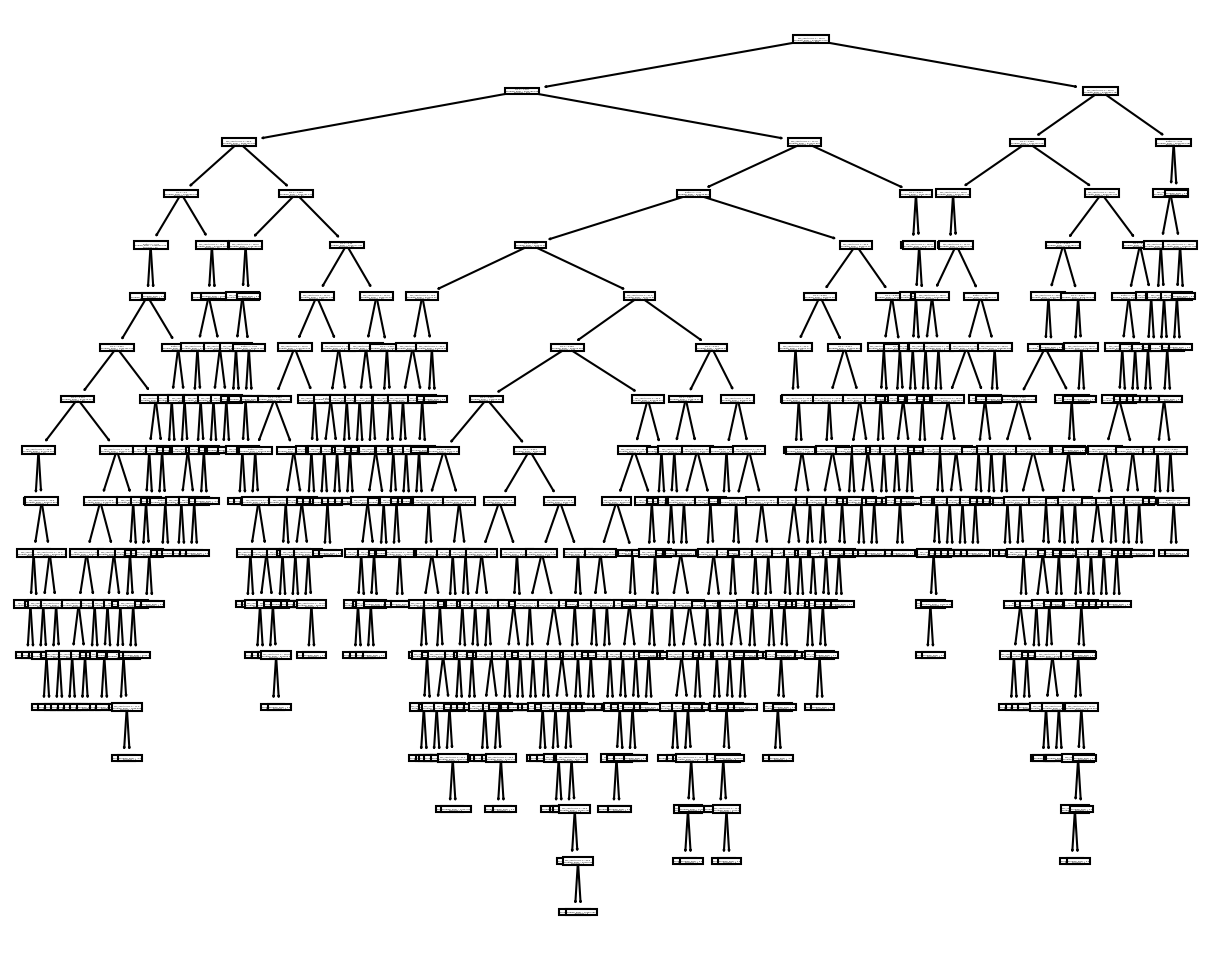

In [17]:
#Podemos imprimir el árbol de decisión:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtree2, feature_names=X2.columns);

Existen muchas variables a nuestro decision tree así como un sobreajuste, por lo que será necesaria una poda de árbol.

In [136]:
# Realizamos la poda ajustando los hiperparámetros
dtree_poda = DecisionTreeRegressor(max_depth=8, min_samples_split=4, min_samples_leaf=4, ccp_alpha=0.01,random_state=42)
dtree_poda.fit(x2_train, y2_train)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=8, min_samples_leaf=4,
                      min_samples_split=4, random_state=42)

In [137]:
# Realizamos predicciones en el conjunto de prueba después de la poda
y_pred_poda = dtree_poda.predict(x2_test)

In [138]:
# Calculamos el error cuadrático medio (MSE) después de la poda
mse_poda = mean_squared_error(y2_test, y_pred_poda)
print(f'MSE después de la poda: {mse_poda}')
print("RMSE:", np.sqrt(mse_poda))
print("R-squared:", r2_score(y2_test, pred2))

MSE después de la poda: 7582204.118053384
RMSE: 2753.580236356548
R-squared: 0.7784468058130066


A través de distintas pruebas y ajustes en los hiperparámetros, estos son aquellos en donde el MSE y RMSE son de menor valor. A pesar d eque no fue posible disminuirlos más que previo a la poda, ya podemos observar una diferencia significativa en nuestra gráfica.

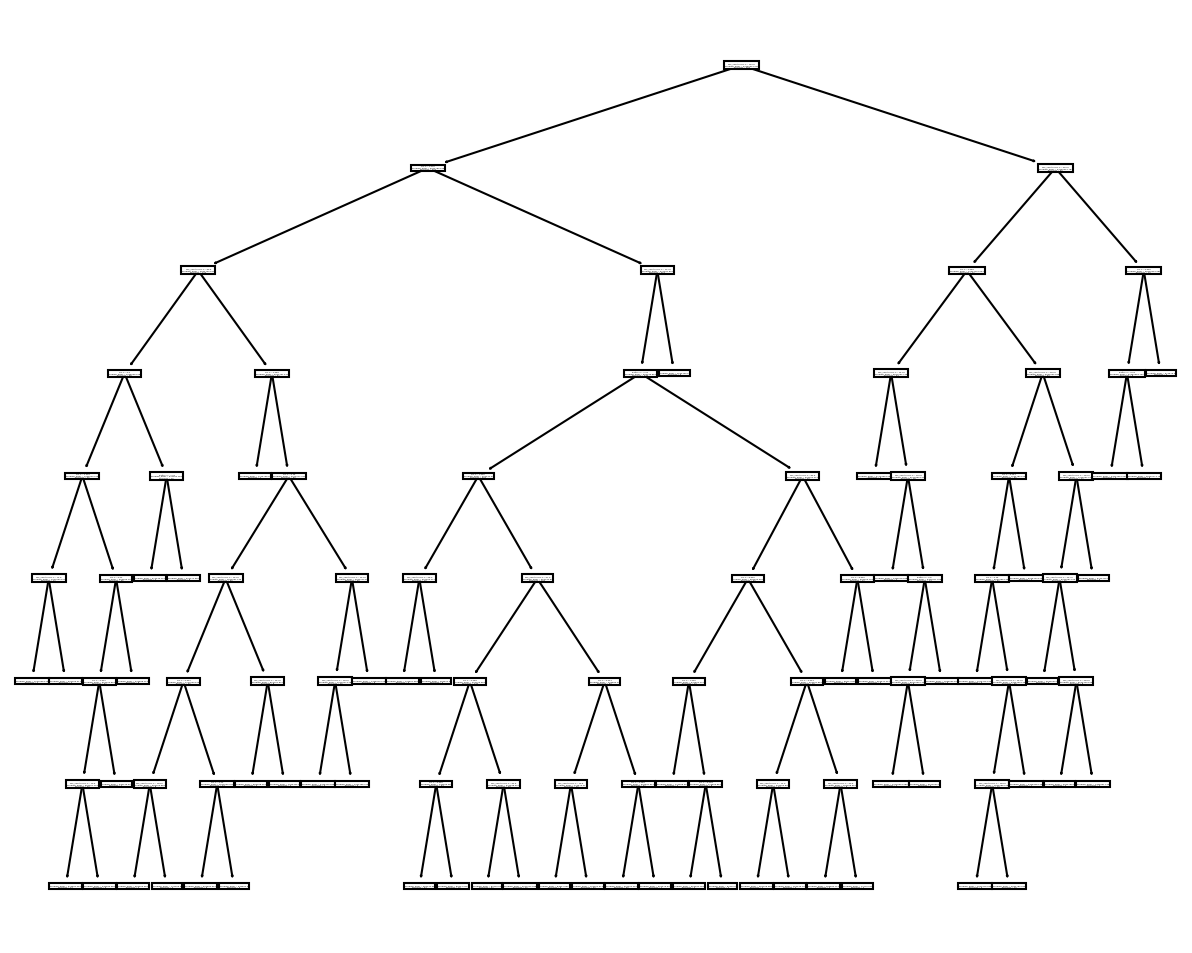

In [139]:
#Podemos imprimir el árbol de decisión:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dtree_poda, feature_names=X2.columns);

In [140]:
#Validación Cruzada para evaluar el rendimiento de nuestro modelo
from sklearn.model_selection import cross_val_score

# Realizamos la validación cruzada con 5 divisiones (k=5)
cross_val_scores = cross_val_score(dtree2, X2, y, cv=5, scoring='r2')

# Imprimimos los puntajes R-squared en cada pliegue
print("R-squared en cada pliegue:", cross_val_scores)

# Imprimimos el R-squared promedio
print("R-squared promedio:", cross_val_scores.mean())

R-squared en cada pliegue: [0.82018596 0.75394096 0.15284877 0.75291088 0.79119665]
R-squared promedio: 0.6542166442177744


Podemos observar que, en promedio, nuestro rendimiento es en realidad del 65.42% (a diferencia del 77.84% como habíamos determinado antes). La validación cruzada implica dividir el conjunto de datos en pliegues (folds) y entrenar/evaluar el modelo en cada uno de ellos. La variabilidad en los pliegues puede resultar en diferentes valores de R-squared en cada iteración, lo cual es especialmente cierto si el conjunto de datos es relativamente pequeño, por lo que es normal si estos dos datos (el R-squared promedio y el general) son distintos.

Por otro lado, el error es demasiado alto, pero posterior a la poda realizada bajó. Debido a que ya se realizaron todos los ajustes correspondientes (ajuste de hiperparámetros, distintas estrategias de poda, validación cruzada), podemos concluir que nuestro R-squared final es de 0.65, lo cual signfica que nuestro modelo puede explicar el 65% de los datos con éxito.

Lo anterior, a pesar de ser un dato significativo, si tomamos en cuenta nuestro error cuadrático medio (RMSE = 2753), no recomendaríamos este modelo para la predicción de los datos, ya que no es del todo confiable. Es probable que esto se deba a que existen muy pocos datos en el dataframe, por lo que no hay suficiente información para realizar una predicción utilizando el modelo de árboles de decisión



### Conclusiones

En resumen, la elección del modelo de regresión lineal múltiple como punto de referencia se fundamenta en su efectividad, respaldada por un coeficiente de determinación (R^2) del 74%. Este valor proporciona una medida sólida de la capacidad del modelo para explicar la variabilidad en los datos.

A pesar de que este valor es muy parecido al resto de los modelos (74% vs 79% vs 65%), lo que ayudó al modelo de Regresión Múltiple a destacarse fue su eficiencia y confiabilidad relacionados con su error medio cuadrático, dado que fue el menor de todos en comparación con el resto de los modelos. Este dato es de suma importancia si lo que se quiere es la seguridad de que el modelo es confiable y sus resultados pueden ser utilizados en un futuro.

La robustez y la capacidad de interpretación inherentes a la regresión lineal múltiple respaldan su elección como la primera opción para comprender y predecir los precios por metro cuadrado de propiedades en la Ciudad de México.